In [15]:
#手の表面を1フレームずつ画像に変換処理--(pro1)
import cv2
import os

save_dir="./hands/otherhands/handura"
cap=cv2.VideoCapture("roka1.mp4")
if not cap.isOpened():
    sys.exit()
n= 0
while True:
    # read()でフレーム画像が読み込めたかを示すbool、フレーム画像の配列ndarrayのタプル
    is_image,frame_img = cap.read()
    if is_image:
        # 画像を保存
        outfile=save_dir+"/"+str(n)+".jpg"
        cv2.imwrite(outfile, frame_img)
    else:
        # フレーム画像が読込なかったら終了
        break
    n += 1

cap.release()
print("ok")

ok


In [16]:
#手の裏面を1フレームずつ画像に変換処理--(pro1)
import cv2
import os

save_dir="./hands/otherhands/handura"
cap=cv2.VideoCapture("IMG_2775.MOV")
if not cap.isOpened():
    sys.exit()
no=129
n= 0
while True:
    # read()でフレーム画像が読み込めたかを示すbool、フレーム画像の配列ndarrayのタプル
    is_image,frame_img = cap.read()
    if is_image:
        # 画像を保存
        outfile=save_dir+"/"+str(no)+".jpg"
        cv2.imwrite(outfile, frame_img)
    else:
        # フレーム画像が読込なかったら終了
        break
    n += 1
    no += 1

cap.release()
print("ok")

ok


In [52]:
#画像ファイルを読み込んでNumpy形式に変換--(pro2)
import numpy as np
from PIL import Image
import os,glob,random

outfile="hands/hands.npz"#保存ファイル名
max_photo=16000#利用する写真の枚数
photo_size=32#32ピクセルに変換
x=[]#画像データ
y=[]#ラベルデータ

def main():
    #各画像のフォルダーを読み込む
    glob_files("./hands/hands",0)
    glob_files("./hands/myhand",1)
    #glob_files("./hands/otherhands/handomote",2)
    #glob_files("./hands/otherhands/handura",3)
    #glob_files("./hands/rokkahands/handomote",4)
    #glob_files("./hands/rokkahands/handura",5)
    #ファイルへ保存
    np.savez(outfile,x=x,y=y)
    print("保存しました:"+outfile,len(x))
    
#path以下の画像を読み込む
def glob_files(path,label):
    files=glob.glob(path+"/*.jpg")
    random.shuffle(files)
    #各ファイルを処理
    num=0
    for f in files:
        if num>=max_photo: break
        num+=1
        #画像ファイルを読み込む
        img=Image.open(f)
        img=img.convert("RGB")#色空間をRGBに
        img=img.resize((photo_size,photo_size))#サイズ変更
        img=np.asarray(img)
        x.append(img)
        y.append(label)
if __name__=='__main__':
    main()

保存しました:hands/hands.npz 15314


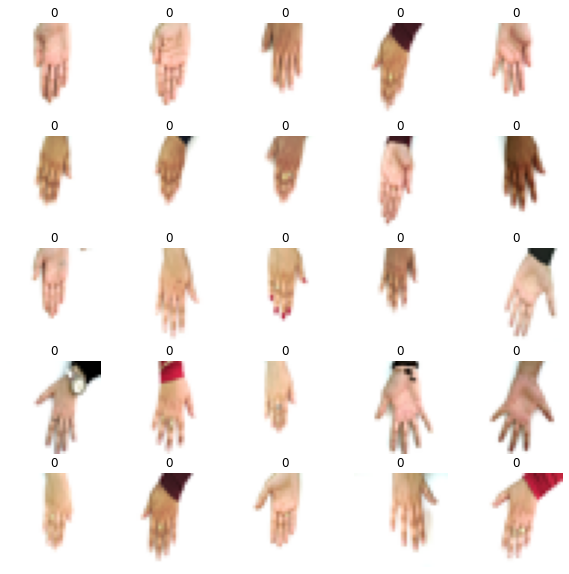

In [32]:
#pro2のnumpyファイルが正しく保存されているかの確認プログラム
import matplotlib.pyplot as plt
#写真データ読み込み
photos=np.load('hands/hands.npz')
x=photos['x']
y=photos['y']
#開始インデックス
idx=893
#pyplotで出力
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis("off")
    plt.title(y[i+idx])
    plt.imshow(x[i+idx])
plt.show()

Epoch 1/20
383/383 [==============================] - 26s 67ms/step - loss: 0.0678 - accuracy: 0.9841 - val_loss: 1.7586e-05 - val_accuracy: 1.0000
Epoch 2/20
383/383 [==============================] - 26s 69ms/step - loss: 0.0329 - accuracy: 0.9984 - val_loss: 2.2067e-08 - val_accuracy: 1.0000
Epoch 3/20
383/383 [==============================] - 27s 69ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 3.0357e-09 - val_accuracy: 1.0000
Epoch 4/20
383/383 [==============================] - 30s 78ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
383/383 [==============================] - 28s 73ms/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 1.3544e-08 - val_accuracy: 1.0000
Epoch 6/20
383/383 [==============================] - 27s 71ms/step - loss: 3.8845e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
383/383 [==============================] - 26s 67ms/step - loss: 9.7306e-12 - accuracy: 1.0000 - 

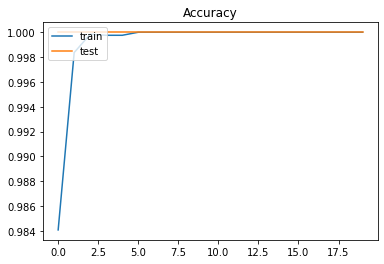

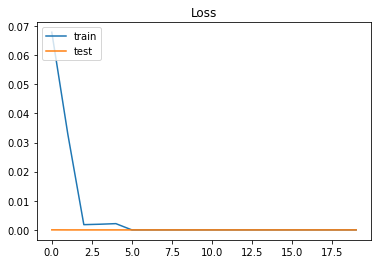

In [53]:
#CNNモデルの構築とCNNモデルを用いた機械学習--(pro3)
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# CNNのモデルを定義する
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

# コンパイル済みのCNNのモデルを返す
def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model


# 入力と出力を指定 --- (*1)
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 2 #ラベルの数【出力】

# 写真データを読み込み --- (*2)
photos = np.load('hands/hands.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNNモデルを取得 --- (*6)
model = get_model(in_shape, nb_classes)

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*9)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./hands/photos-model-light.hdf5')

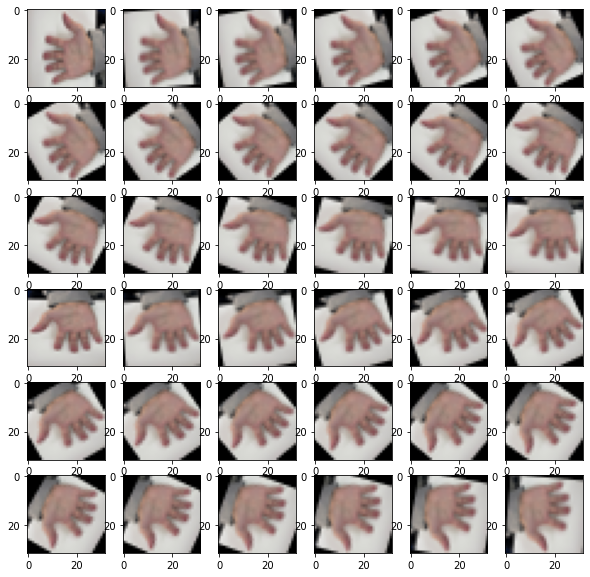

In [19]:
#データを水増しして表示するプログラム--(pro4)
import matplotlib.pyplot as plt
import cv2

#写真データの読み込み
photos=np.load('hands/photos.npz')
x=photos['x']
img=x[12]#わかりやすい写真を選択

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    #回転を実行
    center = (16,16)#回転の中心点
    angle=i*5#角度を変えて出力
    scale=1.0#拡大率
    mtx=cv2.getRotationMatrix2D(center,angle,scale)
    img2=cv2.warpAffine(img,mtx,(32,32))
    #回転した画像を表示
    plt.imshow(img2)
plt.show()

In [54]:
#データを水増しして学習するプログラム
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# CNNのモデルを定義する
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

# コンパイル済みのCNNのモデルを返す
def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model


# 入力と出力を指定 --- (*1)
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 2

# 写真データを読み込み --- (*2)
photos = np.load('hands/hands.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

#学習用データを水増しする
x_new=[]
y_new=[]
for i ,xi in enumerate(x_train):
    yi=y_train[i]
    for ang in range(-30,30,5):
        #回転させる
        center=(16,16)#回転の中心点
        mtx=cv2.getRotationMatrix2D(center,ang,1.0)
        xi2=cv2.warpAffine(xi,mtx,(32,32))
        x_new.append(xi2)
        y_new.append(yi)
        #さらに左右反転させる
        xi3=cv2.flip(xi2,1)
        x_new.append(xi3)
        y_new.append(yi)
        
#水増しした画像を学習用に置き換える
print("水増し前＝",len(y_train))
x_train=np.array(x_new)
y_train=np.array(y_new)
print('水増し後=',len(y_train))

# CNNモデルを取得 --- (*6)
model = get_model(in_shape, nb_classes)

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*9)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./hands/photos-model-light.hdf5')

水増し前＝ 12251
水増し後= 294024
Epoch 1/20
 526/9189 [>.............................] - ETA: 10:36 - loss: 0.0881 - accuracy: 0.9790

KeyboardInterrupt: 

In [51]:
#水増しした画像をフォルダに保存するプログラム【自分の手用】--(pro5)
import cv2,glob,os

def main():
    img_files = glob.glob('./hands/myhand/*.jpg')
    for i in img_files:
        img = cv2.imread(i)
        height, width, channels = img.shape
        center = (int(width/2), int(height/2))
        for ang in range(-30,30,5):
            #回転させる
            center=(16,16)#回転の中心点
            mtx=cv2.getRotationMatrix2D(center,ang,1.0)
            img2=cv2.warpAffine(img,mtx,(height,width))
            cv2.imwrite(str(i)+"_"+str(ang)+".jpg",img2)


if __name__ == "__main__":
    main()